#### Implement Regression Tree on Synthetic Data

In [1]:
import numpy as np
import pandas as pd
from sklearn.datasets import make_regression
from decisiontree import RegressionTree
from decision_tree_utils import *

##### 1. Regression Tree using MSE with 'max_depth=3' on manually generated data

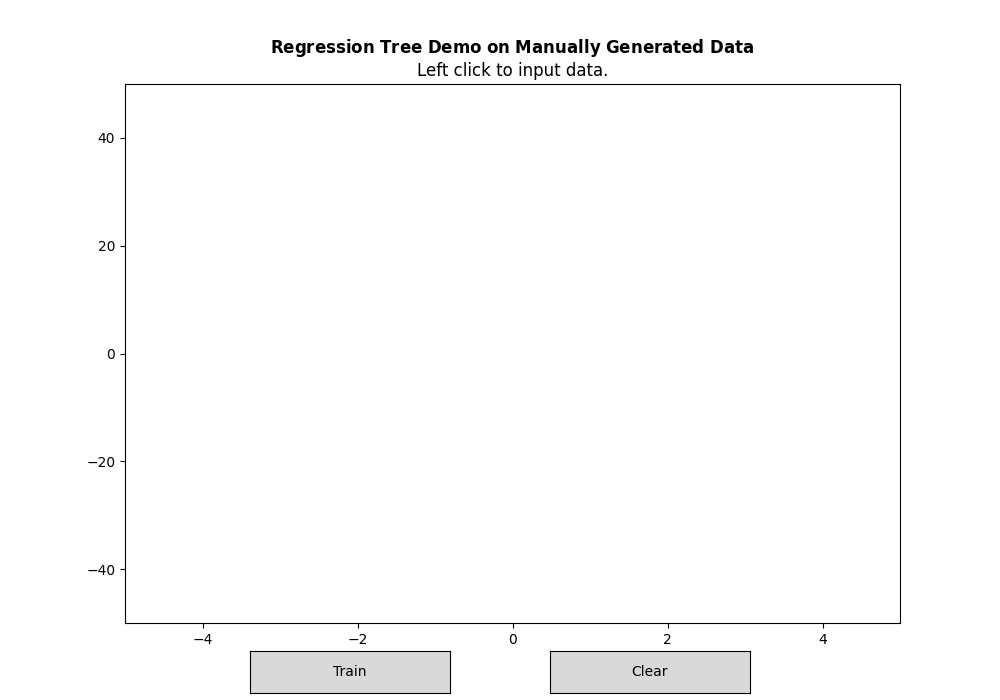

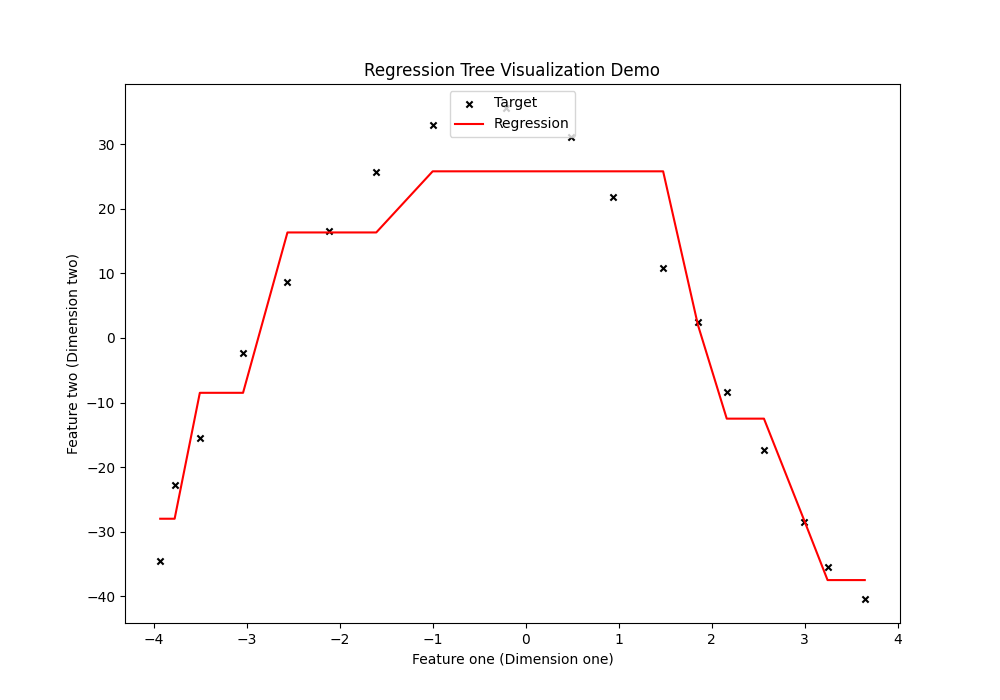

In [2]:
%matplotlib widget
interactive_data_collection_regression()

##### 2. Regression Tree using MSE with no regulation on linear data

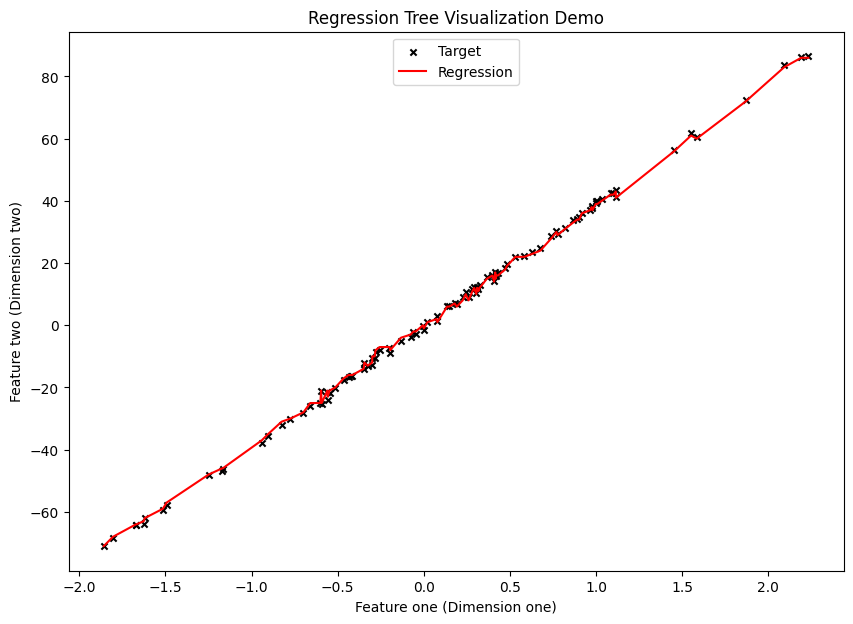

In [2]:
X, y = make_regression(n_samples=100, n_features=1, noise=1)

tree = RegressionTree(criterion='mse')
tree.fit(X, y)

# Plot regression and target points
create_regression_plot(tree, X, y)

##### 3. Regression Tree using MAE with different regulation parameters on nonlinear data

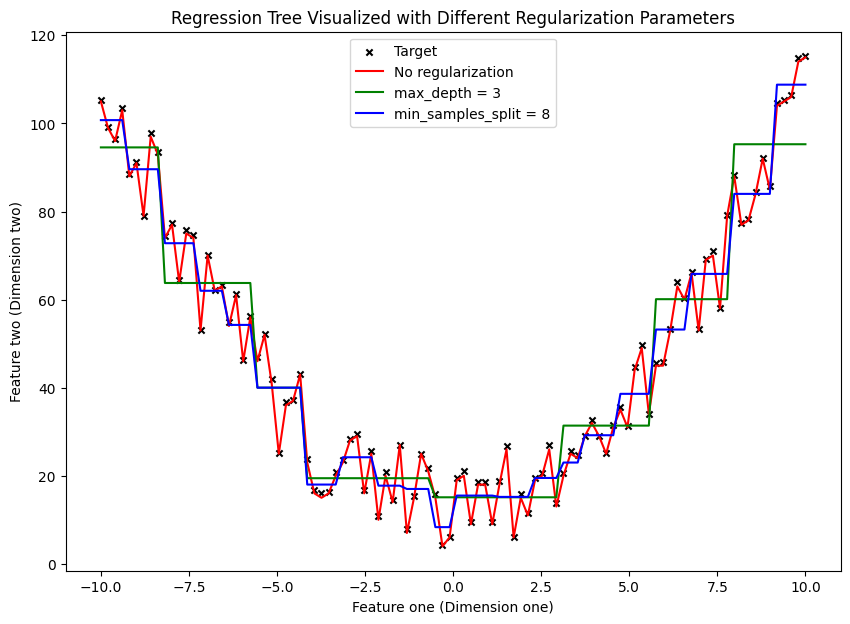

In [3]:
# Create the training set.
X = np.linspace(-10, 10, 100)
y = [x**2 + np.random.rand() * 25 for x in X]
X = np.array(X)
y = np.array(y)

# Fit the training set to each model with different regulation parameters
tree_one = RegressionTree(criterion='mae')
tree_two = RegressionTree(criterion='mae', max_depth=3)
tree_three = RegressionTree(criterion='mae', min_split_samples=8)
tree_one.fit(X, y)
tree_two.fit(X, y)
tree_three.fit(X, y)

# Get the predictions of Regression Tree
pred_one = [tree_one.predict_value(x) for x in X]
pred_two = [tree_two.predict_value(x) for x in X]
pred_three = [tree_three.predict_value(x) for x in X]

# Plot the predictions of each model on the same set of axes.
plt.figure(figsize=(10, 7))

plt.scatter(X, y, s=20, c='black', marker='x', label='Target')
plt.plot(X, pred_one, c='red', label='No regularization')
plt.plot(X, pred_two, c='green', label='max_depth = 3')
plt.plot(X, pred_three, c='blue', label='min_samples_split = 8')

plt.legend(loc='upper center')
plt.xlabel('Feature one')
plt.ylabel('Feature two')
plt.title('Regression Tree Visualized with Different Regularization Parameters')
plt.show()

#### Implement Regression Tree on Predicting House Price

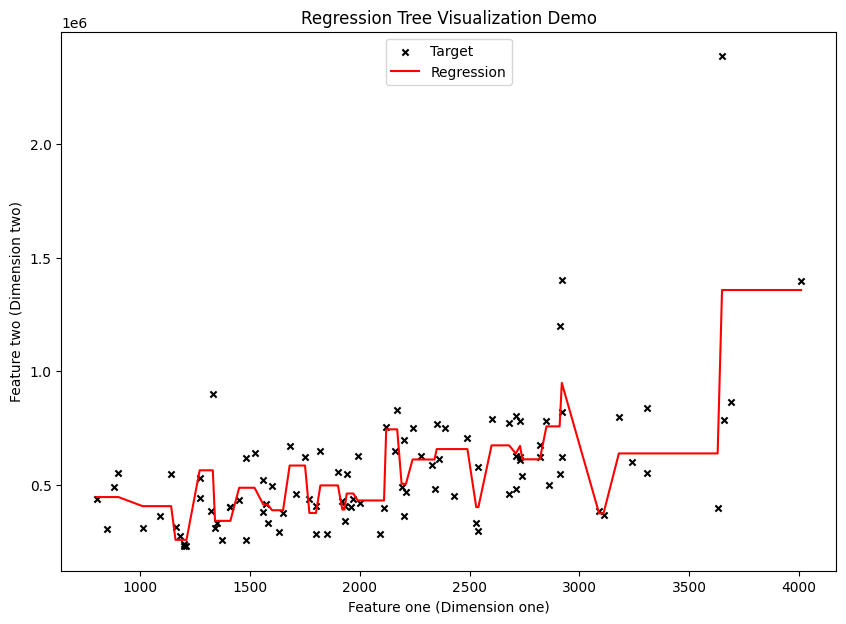

R-squared score (R²):  0.41297483111055266


In [4]:
# Load Data
house_data = pd.read_csv('../dataset/house_price.csv')

# Select first 100 training and next 50 testing data
train_X = np.array(house_data['sqft_living'].head(100))
train_Y = np.array(house_data['price'].head(100))
test_X = np.array(house_data['sqft_living'].iloc[100:150])
test_Y = np.array(house_data['price'].iloc[100:150])

# Fit the model
tree = RegressionTree(criterion='mse', min_split_samples=6, min_leaf_samples=1)
tree.fit(train_X, train_Y)

# Plot regression and target points
create_regression_plot(tree, train_X, train_Y)

# Evaluate model performance on testing data
pred_Y = [tree.predict_value(x) for x in test_X]
evaluate_model(test_Y, pred_Y, 'regression')